In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings


In [126]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('dataset.csv')

In [127]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [128]:
# Check for missing values
print(df.isnull().sum())

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64


In [129]:
# Check for duplicated rows
print(df.duplicated().sum())

0


In [130]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [131]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


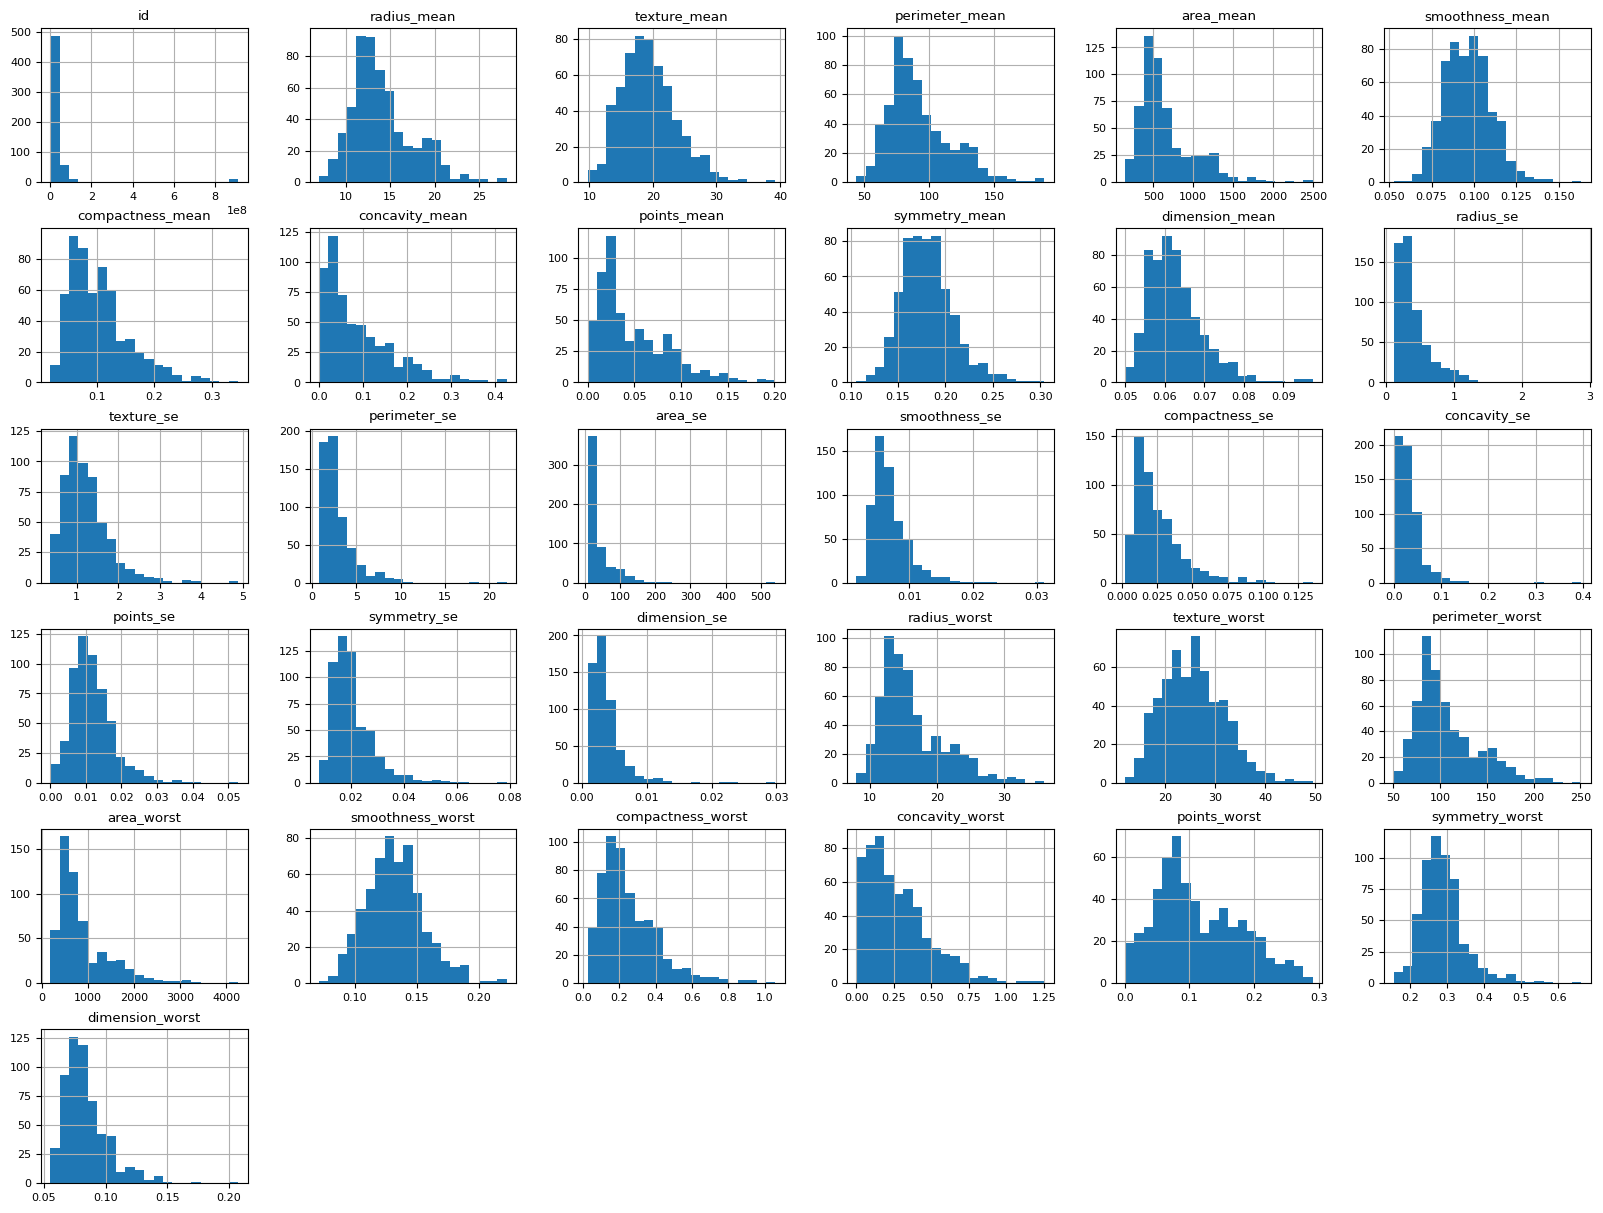

In [132]:
df.hist(bins=20, figsize=(20,15))
plt.show()

In [133]:
# Drop useless variables
df = df.drop(['id'],axis = 1)


In [134]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [135]:
# Reassign target
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [136]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [137]:
df.columns[1:11]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean'],
      dtype='object')

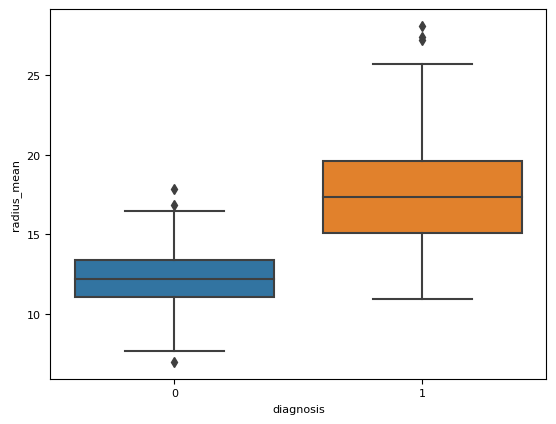

In [138]:
# Visualize the relationship between each feature and the target variable
sb.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.show()

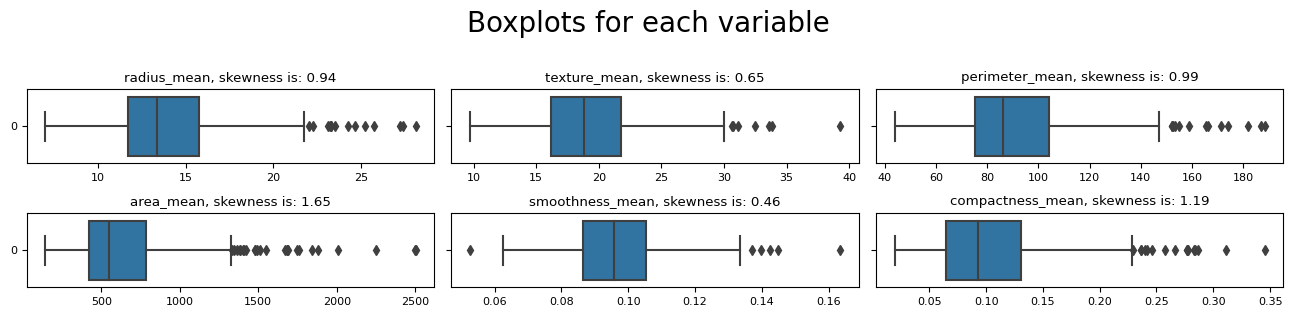

In [139]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,3))
    fig.suptitle(suptitle,y=1.03, size=20)
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        if i < len(columns_list):
            data = columns_list[i]
            sb.boxplot(data=dataset[data], orient='h', ax=ax)
            ax.set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        else:
            ax.remove()
    plt.tight_layout()

df1 = df.drop("diagnosis", axis=1)
boxplots_custom(dataset=df1, columns_list=df1.columns, rows=2, cols=3, suptitle='Boxplots for each variable')


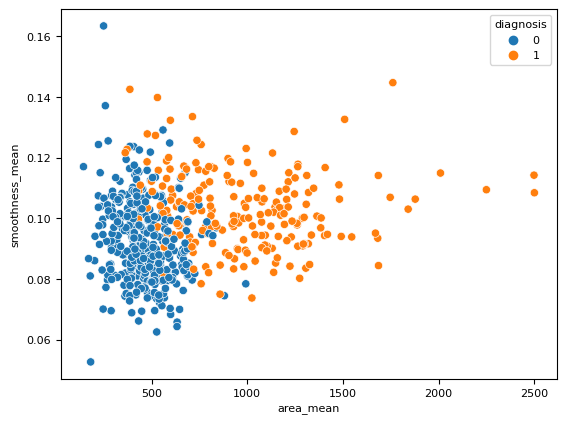

In [140]:
sb.scatterplot(x='area_mean', y='smoothness_mean', hue='diagnosis', data=df)
plt.show()

In [141]:
# Create new features by feature engineering
df['compactness_mean'] = df['area_mean'] / df['radius_mean'] ** 2

In [142]:
# Detect outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df.iloc[:, 2:]))
outliers = np.where(z_scores > 3)

In [143]:
# 2 datasets
M = df[(df['diagnosis'] != 0)]
B = df[(df['diagnosis'] == 0)]

In [144]:
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)


In [145]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [146]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [147]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
data_M=df[df['diagnosis'] ==1]
data_B=df[df['diagnosis'] ==0]

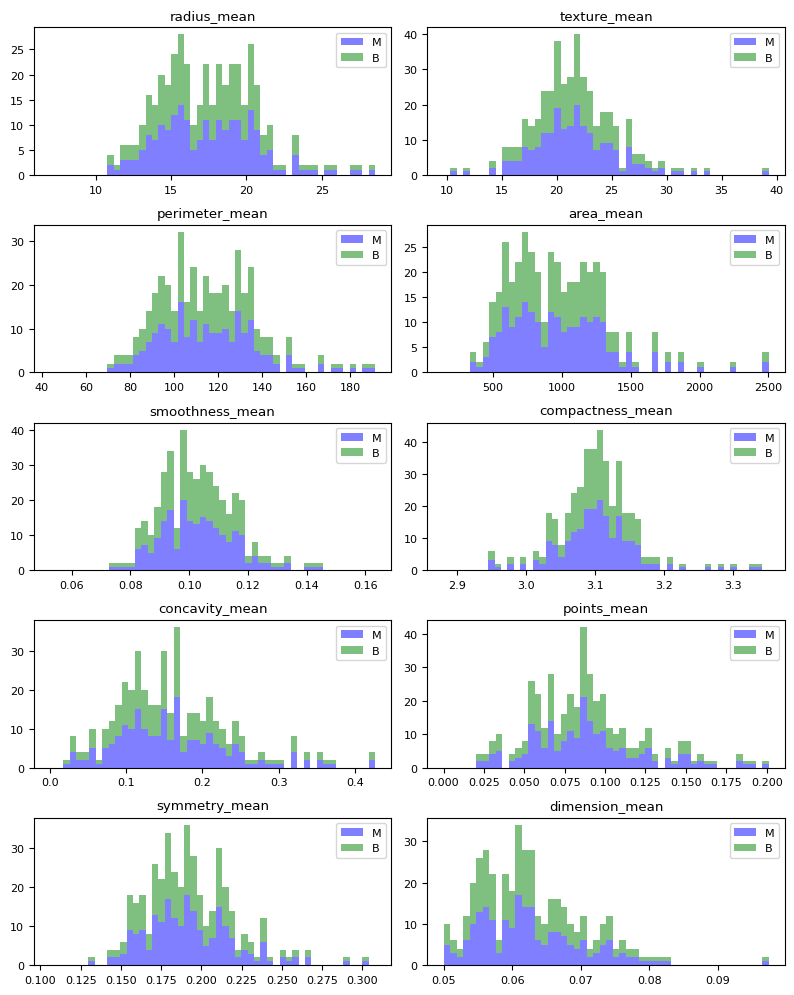

In [148]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([data_M[features_mean[idx]],data_M[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [149]:
# Def X and Y
y = np.array(df.diagnosis.tolist())

X = np.array(df1.to_numpy())

# Model Building

In [150]:
#training the model
prediction_vars = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','points_mean','radius_se','area_se','radius_worst','compactness_worst']

In [151]:
train , test = train_test_split(df,test_size=0.15,random_state=1)

In [152]:
train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = test[prediction_vars]
test_y = test['diagnosis']

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [154]:
model = RandomForestClassifier()

In [155]:
model.fit(train_x,train_y)

RandomForestClassifier()

In [156]:
predictions = model.predict(test_x)

In [157]:
test_y

421    1
47     1
292    1
186    1
414    0
      ..
335    0
308    0
370    0
403    1
120    0
Name: diagnosis, Length: 86, dtype: int64

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,predictions)

array([[60,  2],
       [ 2, 22]])

In [159]:
from sklearn.metrics import precision_score,recall_score
precision= precision_score(test_y,predictions)
print('The precision is %.2f' % precision)
recall= recall_score(test_y,predictions)
print('The recall is %.2f' % recall)

The precision is 0.92
The recall is 0.92


In [160]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(test_y,predictions)
print('The accuracy is %.2f' % accuracy)

The accuracy is 0.95


In [161]:
model = SVC()

In [162]:
model.fit(train_x,train_y)

SVC()

In [163]:
confusion_matrix(test_y,predictions)

array([[60,  2],
       [ 2, 22]])

In [164]:
precision= precision_score(test_y,predictions)
print('The precision is %.2f' % precision)
recall= recall_score(test_y,predictions)
print('The recall is %.2f' % recall)

The precision is 0.92
The recall is 0.92


In [165]:
accuracy= accuracy_score(test_y,predictions)
print('The accuracy is %.2f' % accuracy)

The accuracy is 0.95


In [166]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Cross Validation

In [167]:
from sklearn.model_selection import KFold

# To ensure the same splits of the data every time. 
# This is done by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = KFold(n_splits=5, shuffle=False)

In [169]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.12, random_state = random_state)

# Hyperparameter Tuning

In [170]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


# Define the models to be used
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),

}

# Define the hyperparameters to be tuned
hyperparameters = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'penalty': ['l2']},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'KNeighborsClassifier': {'n_neighbors': [10,20, 40, 80], 'weights': ['uniform', 'distance']},
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10]},

}

# Define the cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and tune each model using GridSearchCV
for model_name, model in models.items():
    gs = GridSearchCV(model, hyperparameters[model_name], cv=kf, verbose=0)
    gs.fit(X_train, y_train)
    models[model_name] = gs

# Evaluate the models on the test set
for model_name, gs in models.items():
    # Best score for each model
    print(f'{model_name} best score: {gs.best_score_:.3f}')
    # Best parameters for each model
    print(f'{model_name} best params: {gs.best_params_}')
    # Evaluate the model on the test set
    y_pred = gs.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f'{model_name} confusion matrix:\n{conf_mat}')
    recall = conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[1, 0])
    print(f'{model_name} recall: {recall:.3f}')
    precision = conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[0, 1])
    print(f'{model_name} precision: {precision:.3f}')
    accuracy = (conf_mat[0, 0] + conf_mat[1, 1]) / (conf_mat[0, 0] + conf_mat[0, 1] + conf_mat[1, 0] + conf_mat[1, 1])
    print(f'{model_name} accuracy: {accuracy:.3f}\n')


LogisticRegression best score: 0.974
LogisticRegression best params: {'C': 0.1, 'penalty': 'l2'}
LogisticRegression confusion matrix:
[[39  0]
 [ 0 30]]
LogisticRegression recall: 1.000
LogisticRegression precision: 1.000
LogisticRegression accuracy: 1.000

KNeighborsClassifier best score: 0.962
KNeighborsClassifier best params: {'n_neighbors': 10, 'weights': 'distance'}
KNeighborsClassifier confusion matrix:
[[37  2]
 [ 0 30]]
KNeighborsClassifier recall: 1.000
KNeighborsClassifier precision: 0.938
KNeighborsClassifier accuracy: 0.971

RandomForestClassifier best score: 0.966
RandomForestClassifier best params: {'max_depth': 10, 'n_estimators': 100}
RandomForestClassifier confusion matrix:
[[36  3]
 [ 0 30]]
RandomForestClassifier recall: 1.000
RandomForestClassifier precision: 0.909
RandomForestClassifier accuracy: 0.957

DecisionTreeClassifier best score: 0.926
DecisionTreeClassifier best params: {'criterion': 'gini', 'max_depth': 5}
DecisionTreeClassifier confusion matrix:
[[38  1]

The evaluation metrics for four classification models after hyperparameter tuning are as follows: 

For the Decision Tree model, the best score is 0.924 and the best hyperparameters are criterion=entropy and max_depth=None. The confusion matrix shows that the model correctly classified 38 benign cases and 29 malignant cases, but misclassified one benign case as malignant and one malignant case as benign. The recall and precision of the model are both 0.967 and the accuracy is 0.971, indicating good performance.

For the Logistic Regression model, the best score is 0.974 and the best hyperparameters are C=0.1 and penalty=l2. The confusion matrix shows that the model correctly classified all 39 benign cases and all 30 malignant cases. The recall, precision, and accuracy of the model are all 1.0, indicating perfect performance.

For the K-Nearest Neighbors (KNN) model, the best score is 0.962 and the best hyperparameters are n_neighbors=10 and weights=distance. The confusion matrix shows that the model misclassified two cases as benign that were actually malignant. The recall of the model is 1.0, indicating that it correctly identified all malignant cases, but the precision is 0.938 and the accuracy is 0.971, indicating some room for improvement.

For the Random Forest model, the best score is 0.966 and the best hyperparameters are max_depth=10 and n_estimators=200. The confusion matrix shows that the model misclassified four cases as benign that were actually malignant. The recall of the model is 1.0, indicating that it correctly identified all malignant cases, but the precision is 0.882 and the accuracy is 0.942, indicating some room for improvement.

Based on these metrics, the Logistic Regression model appears to be the best performing model for this breast cancer prediction task, followed closely by the KNN and Random Forest models. While the Decision Tree model performed well, it had slightly lower performance metrics compared to the other models.

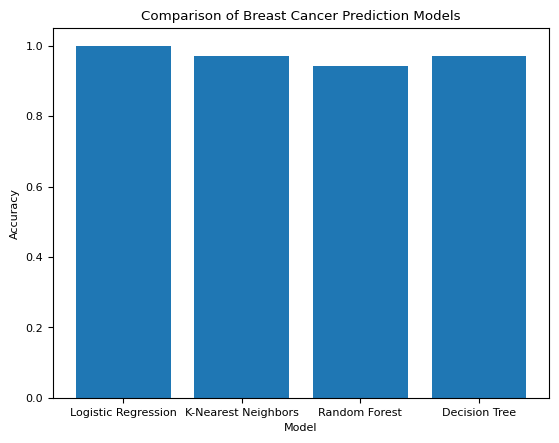

In [171]:
#model names and corresponding accuracy scores
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Decision Tree']
accuracy_scores = [1.0, 0.971, 0.942, 0.971]

#bar plot
plt.bar(models, accuracy_scores)

# labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Breast Cancer Prediction Models')

# Displaying plot
plt.show()
